# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
pip install autogluon

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━

In [39]:
import autogluon.core as ag
from autogluon.tabular import TabularDataset, TabularPredictor
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings

In [4]:
print(lgb.__version__)
print(sns.__version__)

3.3.5
0.13.1


In [5]:
def cat_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    out_dict = {}
    out_dict['accuracy'] = accuracy_score(y_true,y_pred)
    out_dict['f1'] = f1_score(y_true,y_pred)
    out_dict['precision'] = precision_score(y_true,y_pred)
    out_dict['recall'] = recall_score(y_true,y_pred)
    
    return out_dict

df_path = r"C:\Users\Heng2020\OneDrive\Python Modeling\Modeling 01\Dataset Classification\07 recipe_site_traffic_2212.csv"
y_name = "high_traffic"
saved_model_name = "Model LGB.01"

positive_class = "High"
eval_metric='precision'
extra_metrics = ['f1','precision','recall','accuracy']

folder_path = r"C:\Users\Heng2020\OneDrive\Python Modeling\Modeling 01\Code Classification\Classify 04_GLM"
model_path = r"C:/Users/Heng2020/OneDrive/Python Modeling/Modeling 01/Regression 02/Model 02.joblib"
alarm_path = r"H:\D_Music\Sound Effect positive-massive-logo.mp3"


drop_col01 = ['recipe']
drop_col02 = []
drop_col03 = []
drop_col = drop_col01

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [6]:
data_ori = pd.read_csv(df_path,header=0)

mySeed = 20
num_to_cat_col = []

n_data = 10_000

if isinstance(n_data, str) or data_ori.shape[0] < n_data :
    data = data_ori
else:
    data = data_ori.sample(n=n_data,random_state=mySeed)


saved_model_path = folder_path + "/" + saved_model_name + ".joblib"
data_drop = data.drop(drop_col,axis=1)

In [7]:
def format_float(x):
    if abs(x) > 1:
        return ' {:,.0f}'.format(x)
    else:
        return ' {:,.4f}'.format(x)
pd.set_option('display.float_format',format_float)

# 1) Data validation

In [8]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35,39,0.6600,0.9200,Potato,4,High
2,3,914,43,3,3,Breakfast,1,NaN
3,4,97,31,39,0.0200,Beverages,4,High
4,5,27,2,0.8000,0.5300,Beverages,4,NaN


Let check what's going on with the missing data. Seems likes the rows with missing data in 1 column will have non of other columns available.

In [9]:
data.loc[data['calories'].isnull()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [10]:
null_percentage = data['calories'].isnull().mean() * 100
print(f"Percentage of null values in 'calories': {null_percentage:.2f}%")

Percentage of null values in 'calories': 5.49%


Given that we have missing data <6% and the data missing for most columns for these rows, we can safely remove.

Now let's replace null in 'high_traffic' to 'Low' for clarity.

replace '4 as a snack' with 4 &  '6 as a snack' with 6
then convert 'servings' to int

change category to 'catagory' type

In [11]:
################################### Pre processing - specific to this data(Blood Pressure) ##################
def pd_preprocess(data):
    df_cleaned = data.dropna(subset=['calories'])
    # df_cleaned['high_traffic'] = df_cleaned['high_traffic'].astype('object')
    df_cleaned['high_traffic'] = df_cleaned['high_traffic'].fillna('Low')
    
    df_cleaned['servings'] = df_cleaned['servings'].replace({'4 as a snack': 4, '6 as a snack': 6})
    df_cleaned['servings'] = df_cleaned['servings'].astype(int)
    df_cleaned['category'] = data['category'].astype('category')
    return df_cleaned

#---------------------------------- Pre processing - specific to this data(Blood Pressure) -------------------
data = pd_preprocess(data_drop)

C:\Users\Heng2020\AppData\Local\Temp\ipykernel_17012\3718574310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['high_traffic'] = df_cleaned['high_traffic'].fillna('Low')
C:\Users\Heng2020\AppData\Local\Temp\ipykernel_17012\3718574310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['servings'] = df_cleaned['servings'].replace({'4 as a snack': 4, '6 as a snack': 6})
C:\Users\Heng2020\AppData\Local\Temp\ipykernel_17012\3718574310.py:8: SettingWithCopyWarning: 
A value is trying t

In [12]:
data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,35,39,0.6600,0.9200,Potato,4,High
2,914,43,3,3,Breakfast,1,Low
3,97,31,39,0.0200,Beverages,4,High
4,27,2,0.8000,0.5300,Beverages,4,Low
5,691,3,2,54,One Dish Meal,2,High


In [13]:
data.dtypes

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int32
high_traffic      object
dtype: object

let's check about why servings are not properly converted

In [14]:
data.dtypes

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int32
high_traffic      object
dtype: object

Great! Now 'servings' are properly converted

# EDA

I have invested the target variable(high_traffic) to check the balance of data, the distribution of numerical features, and the relationship between target variable and numberical variables using violin plots.

Relationship of high_traffic is not evidently distinct. If there were a relationship, it might be more nuanced and require more sophisticated modeling to detect. 


In [15]:
print(sns.__version__)

0.13.1


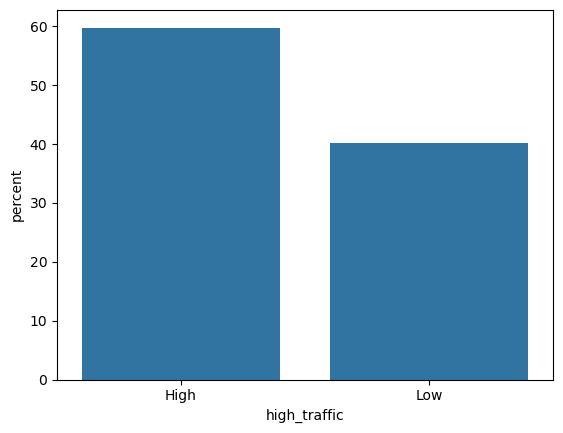

In [16]:
sns.countplot(data=data,x = 'high_traffic',stat="percent");

Seems like the target is somewhat balanced. High contains about 60% of the data.

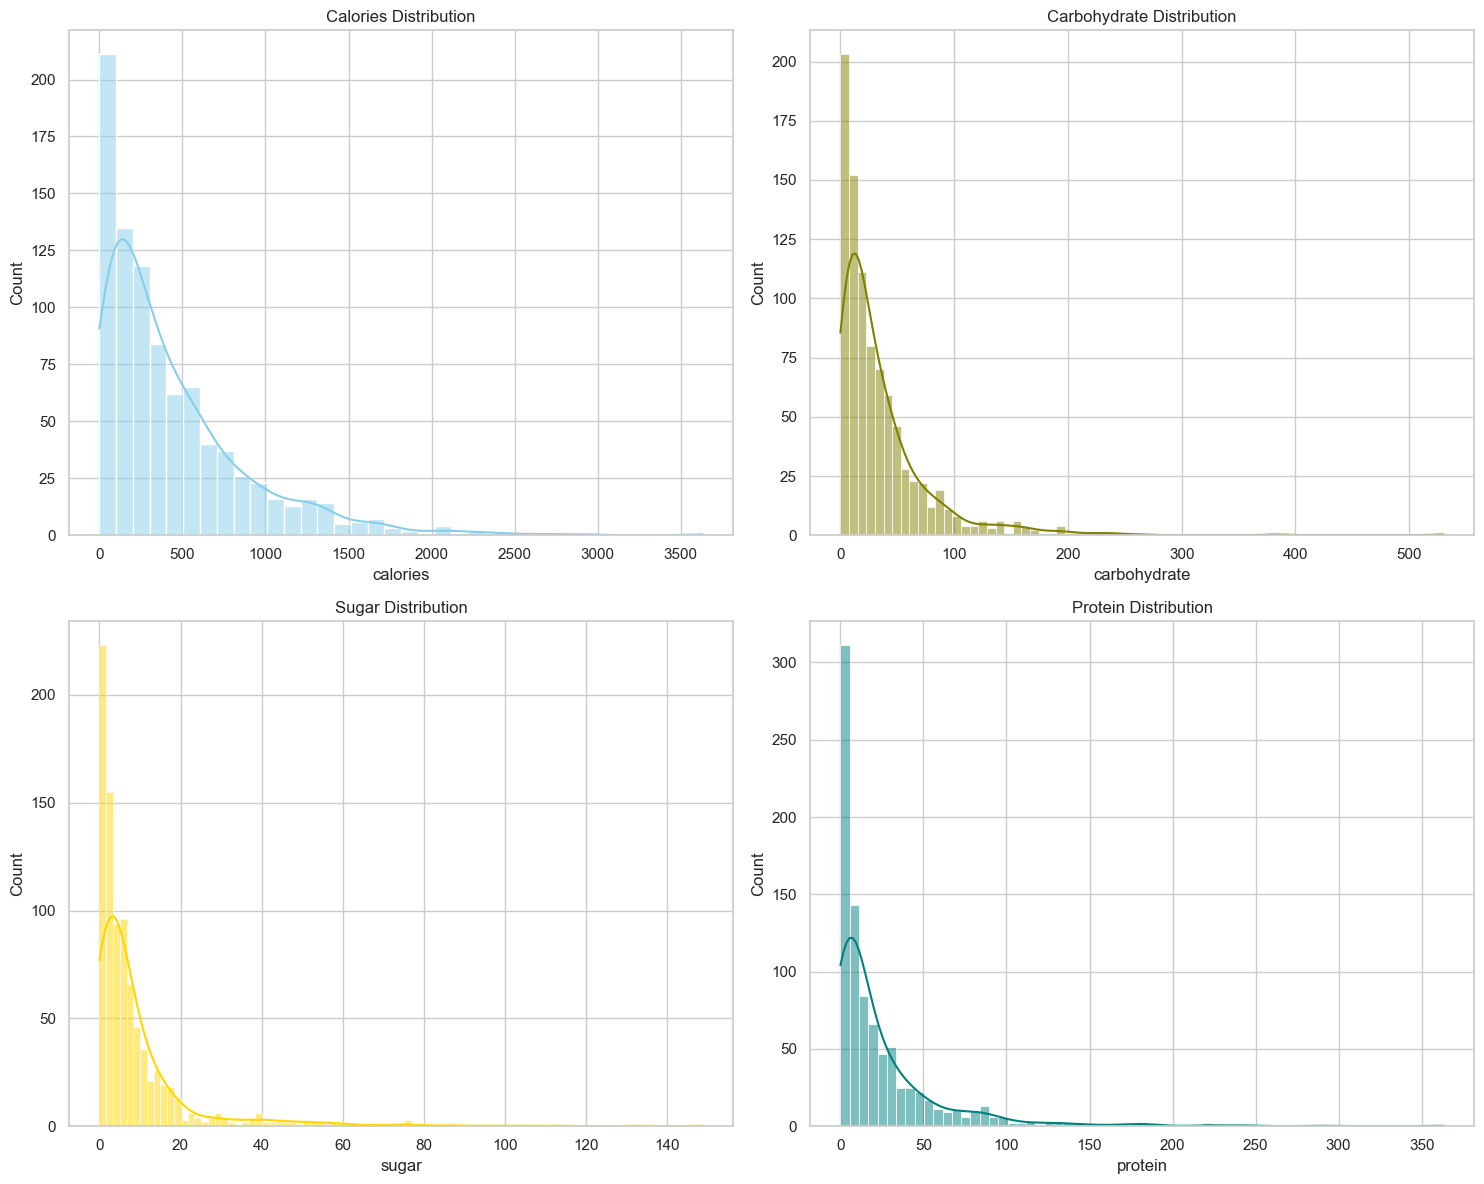

In [17]:
sns.set(style="whitegrid")

# Single Variable Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram for calories
sns.histplot(data['calories'].dropna(), kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Calories Distribution')

# Histogram for carbohydrate
sns.histplot(data['carbohydrate'].dropna(), kde=True, ax=axes[0, 1], color="olive")
axes[0, 1].set_title('Carbohydrate Distribution')

# Histogram for sugar
sns.histplot(data['sugar'].dropna(), kde=True, ax=axes[1, 0], color="gold")
axes[1, 0].set_title('Sugar Distribution')

# Histogram for protein
sns.histplot(data['protein'].dropna(), kde=True, ax=axes[1, 1], color="teal")
axes[1, 1].set_title('Protein Distribution')

plt.tight_layout()
plt.show()




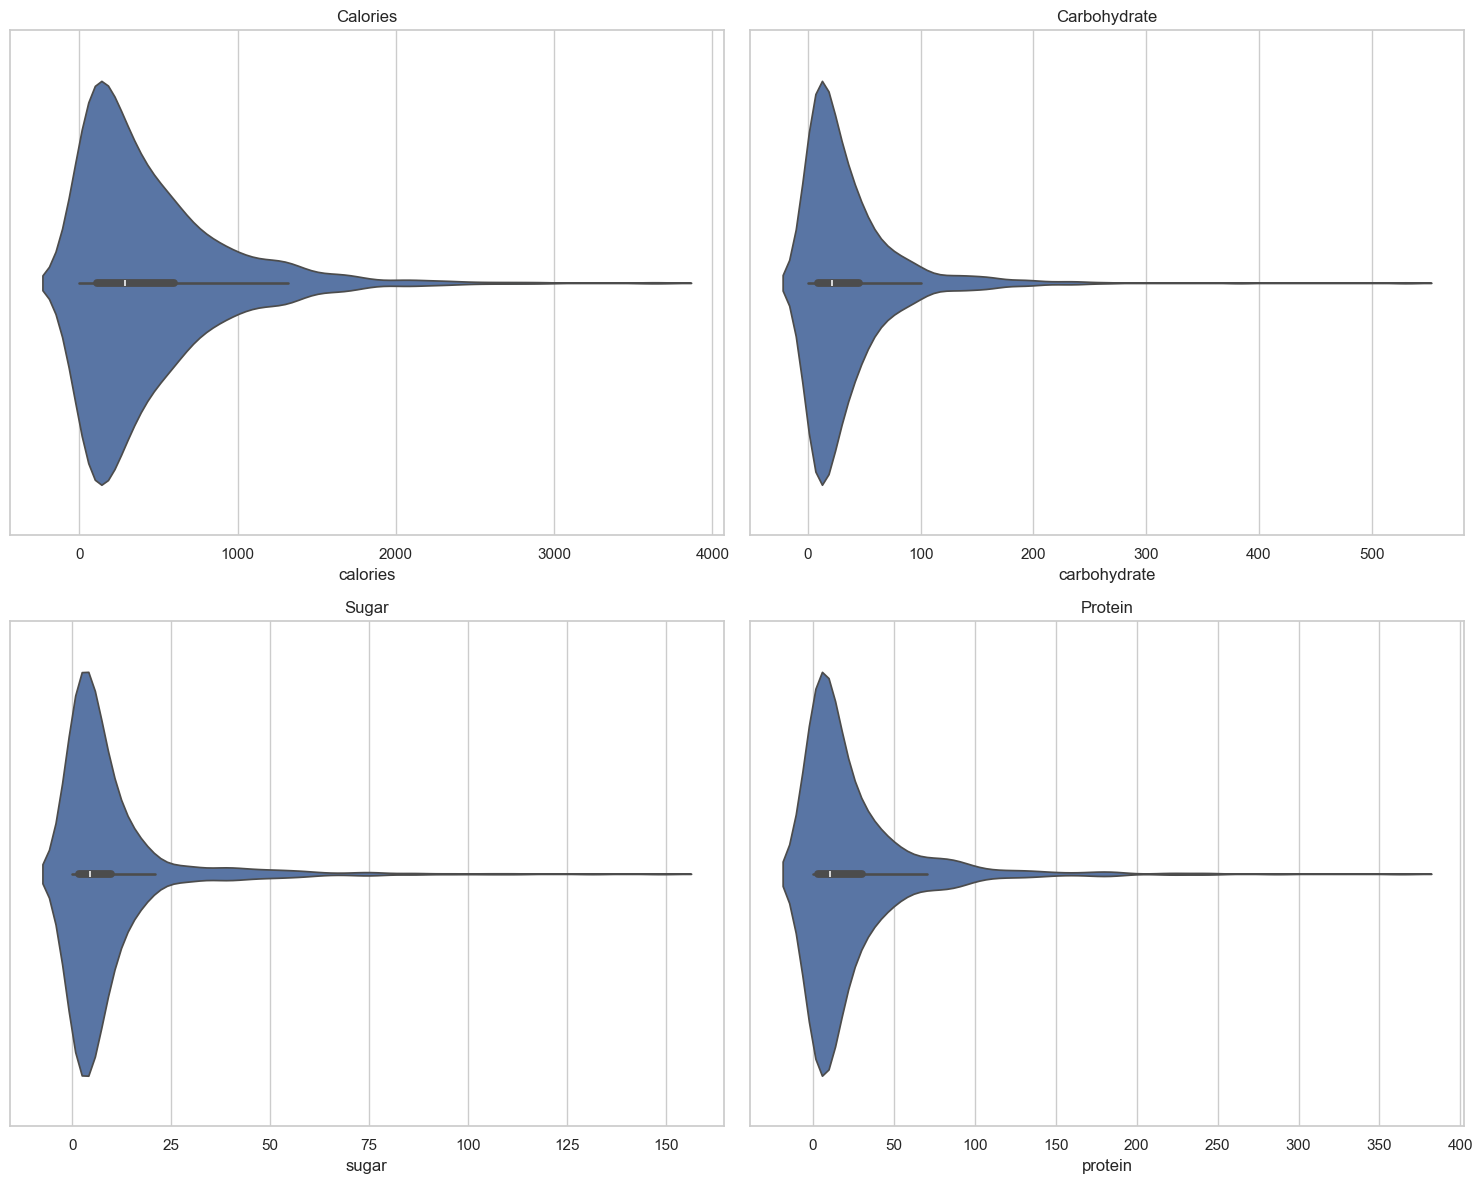

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Violinplot for calories vs high_traffic
sns.violinplot(x='calories', data=data, ax=axes[0, 0],)
axes[0, 0].set_title('Calories')

# Violinplot for carbohydrate vs high_traffic
sns.violinplot(x='carbohydrate', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Carbohydrate')

# Violinplot for sugar vs high_traffic
sns.violinplot(x='sugar', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Sugar')

# Violinplot for protein vs high_traffic
sns.violinplot(x='protein', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Protein')

plt.tight_layout()
plt.show()

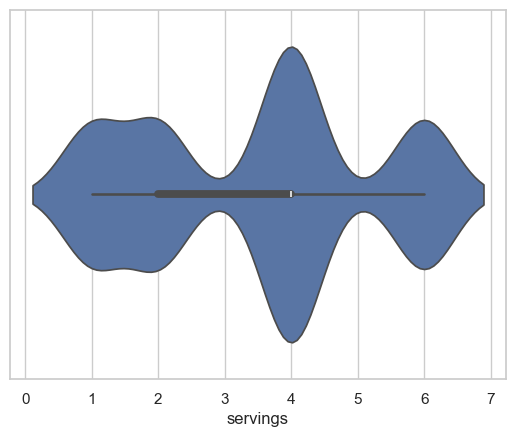

In [19]:
sns.violinplot(x='servings', data=data);

## Single Variable Analysis:


**Calories:** The distribution is right-skewed with most recipes having lower calorie counts and a few recipes with very high calorie counts.

**Carbohydrate:** Similar to calories, it's right-skewed indicating most recipes have lower carbohydrate content.

**Sugar:** Also right-skewed, with most recipes containing lower amounts of sugar.

**Protein:** Shows a right-skewed distribution, indicating lower protein content for most recipes.

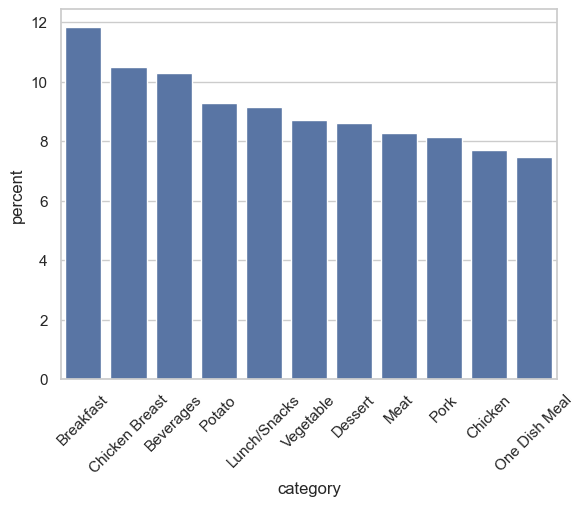

In [20]:
category_order = data['category'].value_counts().index
sns.countplot(data=data,x = 'category',stat="percent", order=category_order);
plt.xticks(rotation=45);

It seems like most common types of recipe are breakfast, chicken breast and beverages.

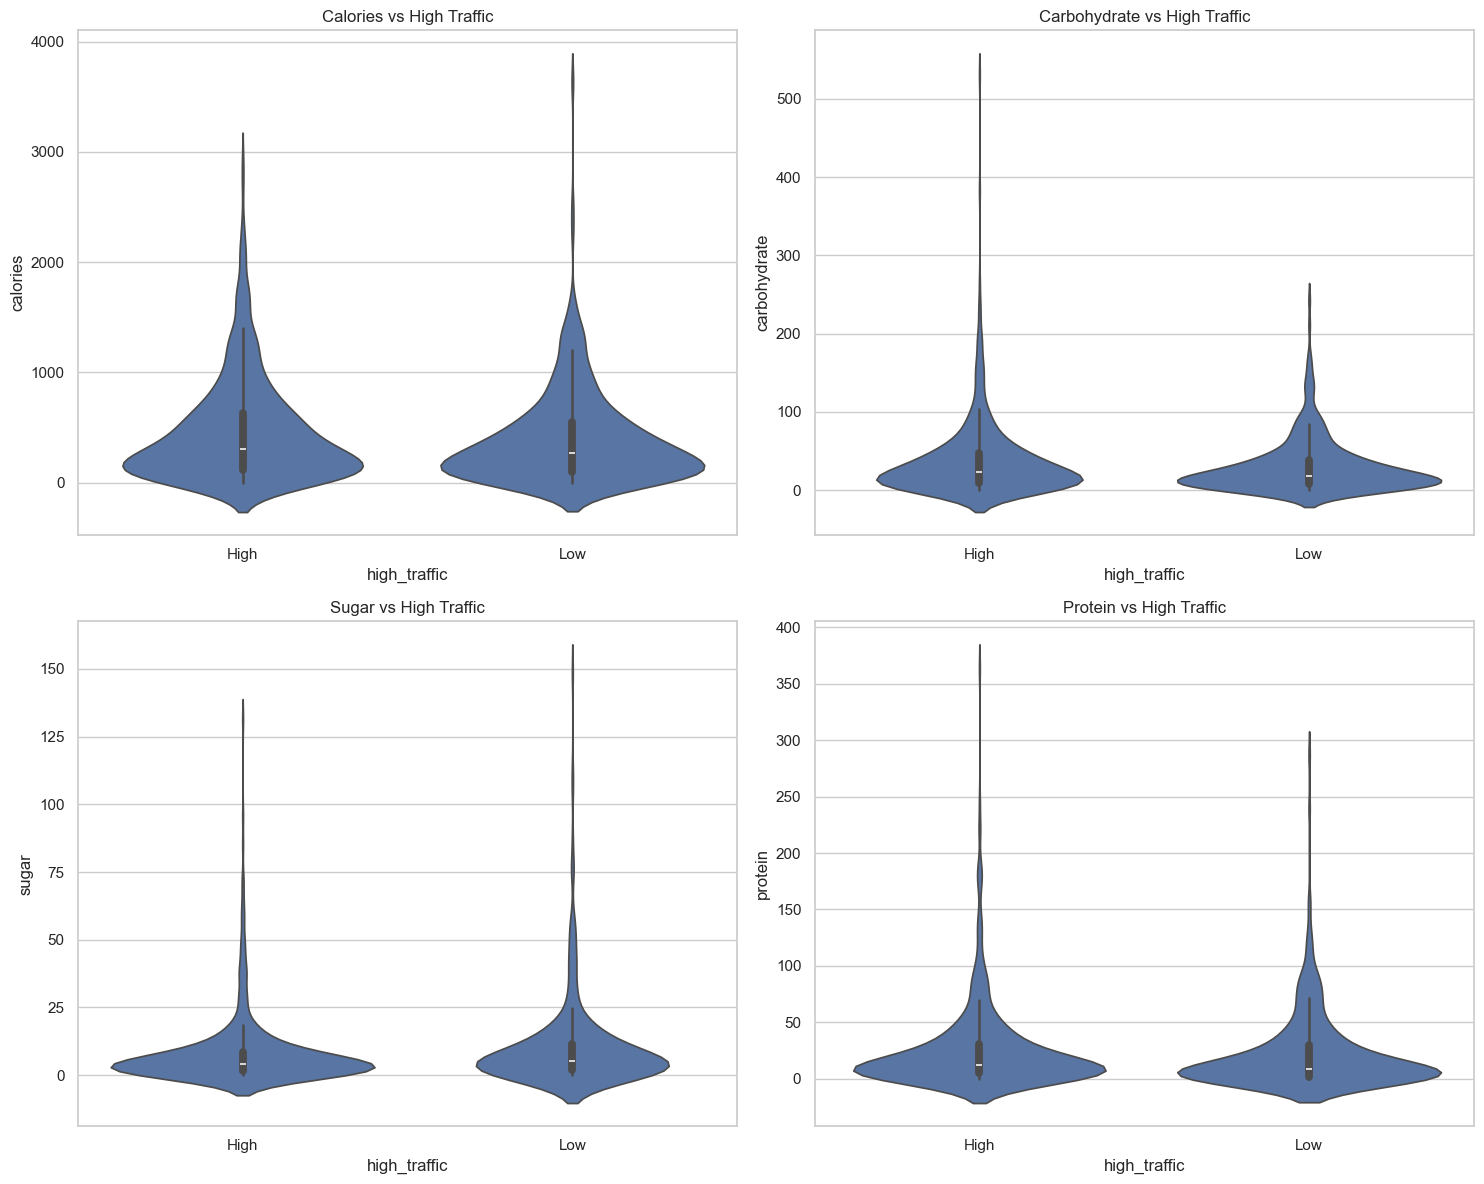

In [21]:
# Multi-variable Analysis (relationship with high_traffic)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Violinplot for calories vs high_traffic
sns.violinplot(x='high_traffic', y='calories', data=data, ax=axes[0, 0],)
axes[0, 0].set_title('Calories vs High Traffic')

# Violinplot for carbohydrate vs high_traffic
sns.violinplot(x='high_traffic', y='carbohydrate', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Carbohydrate vs High Traffic')

# Violinplot for sugar vs high_traffic
sns.violinplot(x='high_traffic', y='sugar', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Sugar vs High Traffic')

# Violinplot for protein vs high_traffic
sns.violinplot(x='high_traffic', y='protein', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Protein vs High Traffic')

plt.tight_layout()
plt.show()

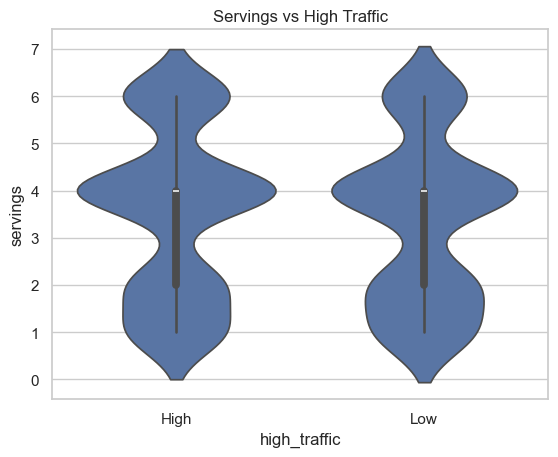

In [22]:
sns.violinplot(x='high_traffic', y='servings', data=data);
plt.title('Servings vs High Traffic');

## Multi-variable analysis

**Calories vs High Traffic**: The violin plots suggest that there's a wide range of calorie values for both high and low traffic recipes. However, it's not immediately clear if there's a strong differentiation between high and low traffic recipes based on calories alone.

**Carbohydrate vs High Traffic:** Similar to calories, both high and low traffic recipes cover a wide range of carbohydrate values.

**Sugar vs High Traffic:** The distribution of sugar content appears similar between the high and low traffic categories.

**Protein vs High Traffic:** Protein content also does not show a clear distinction between high and low traffic recipes.

**Servings vs High Traffic:** Servings also does not show a clear distinction between high and low traffic recipes.

# 3) Model Development

The bussiness goal of this project is to accurately predict which recipes should be shown on the webpage. This is binary classification problem. So we want to make sure that our predictions contain as many 'High' as possible. So for this reason, I will use 'precision' as model evaluation metric.

We don't need to encode categorical features. Autogluon can handle this in the backend.

In [23]:
# convert positive class to 1, negative class to 0
# as of now autogluon, doesn't have a way to specify 
# autogluon version 0.8.2, Jan 6, 2024
data[y_name] = np.where(data[y_name] == positive_class,1,0 )

X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(y_name, axis=1), 
                                        data[y_name], 
                                        test_size=0.2, 
                                        random_state=mySeed)


train_df = pd.concat([X_train,y_train],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)
# Load data
train_data = TabularDataset(train_df) 

C:\Users\Heng2020\AppData\Local\Temp\ipykernel_17012\684361541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_name] = np.where(data[y_name] == positive_class,1,0 )


In [24]:
y_train

325    0
474    1
31     0
52     0
110    0
      ..
231    1
236    1
288    0
501    0
378    1
Name: high_traffic, Length: 716, dtype: int32

---

# Use LightGBM as base model

In [31]:
import lightgbm as lgb
print(lgb.__version__)

3.3.5


In [32]:
X_train['category'] = X_train['category'].astype('category')

In [33]:
X_train.dtypes

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int32
dtype: object

In [34]:
# .fit(train_data,num_bag_folds=5): cross-validation
model = lgb.LGBMClassifier()
model.fit(X_train, y_train, verbose=0)

C:\Users\Heng2020\AppData\Roaming\Python\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier()

In [60]:
predictions = model.predict(X_train)
train_prediction = train_df.copy()
train_prediction[y_name + "_predict"] = predictions
lgb_train_metric = cat_metrics(train_prediction[y_name], train_prediction[y_name + "_predict"])
lgb_train_metric

{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

In [61]:
predictions = model.predict(X_test)
test_prediction = test_df.copy()
test_prediction[y_name + "_predict"] = predictions
lgb_test_metric = cat_metrics(test_prediction[y_name], test_prediction[y_name + "_predict"])
lgb_test_metric

{'accuracy': 0.7039106145251397,
 'f1': 0.7644444444444445,
 'precision': 0.7350427350427351,
 'recall': 0.7962962962962963}

 We got 73.50% precision on our base model from lightgbm

---

# Start by training using Autogluon

In [42]:
warnings.filterwarnings('ignore',category=FutureWarning)

In [44]:
predictor = TabularPredictor(label=y_name, eval_metric = 'precision',path='model_from_precision',verbosity =0, problem_type='binary').fit(train_data)

In [58]:
best_model_name = predictor.get_model_best()
best_model_params = predictor.fit_hyperparameters_
print("The best chosen model name is:")
print(best_model_name)

The best chosen model name is:
WeightedEnsemble_L2


In [46]:
results_train = predictor.leaderboard(train_df, silent=True,extra_metrics=extra_metrics)
results_train

,model,score_test,f1,precision,recall,accuracy,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.9474,0.9583,0.9474,0.9696,0.9497,0.7604,1,0.1346,1,1,0.1346,1,1,True,5
1,RandomForestEntr,0.9448,0.9536,0.9448,0.9625,0.9441,0.7447,0.3471,0.1297,2,0.3471,0.1297,2,1,True,6
2,LightGBMLarge,0.9428,0.9537,0.9428,0.9649,0.9441,0.7396,0.0429,0.0120,13,0.0429,0.0120,13,1,True,13
3,ExtraTreesGini,0.9428,0.9537,0.9428,0.9649,0.9441,0.7396,0.5475,0.0888,0.6642,0.5475,0.0888,0.6642,1,True,8
4,ExtraTreesEntr,0.9408,0.9538,0.9408,0.9672,0.9441,0.7347,1,0.0937,0.8228,1,0.0937,0.8228,1,True,9
5,KNeighborsDist,0.8982,0.9137,0.8982,0.9297,0.8953,0.5545,0.0100,0.0319,0.0189,0.0100,0.0319,0.0189,1,True,2
6,LightGBM,0.8795,0.9006,0.8795,0.9227,0.8785,0.7684,0.0798,0.0130,6,0.0798,0.0130,6,1,True,4
7,LightGBMXT,0.8247,0.8571,0.8247,0.8923,0.8226,0.7935,0.0229,0.0967,9,0.0229,0.0967,9,1,True,3
8,WeightedEnsemble_L2,0.8164,0.8396,0.8164,0.8642,0.8031,0.8152,0.6473,0.4289,99,0.0180,0.0070,29,2,True,14
9,NeuralNetFastAI,0.8083,0.8375,0.8083,0.8689,0.7989,0.7629,0.0668,0.0299,3,0.0668,0.0299,3,1,True,10


In [47]:
results_test = predictor.leaderboard(test_df, silent=True,extra_metrics=extra_metrics)
results_test

,model,score_test,f1,precision,recall,accuracy,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.7787,0.8261,0.7787,0.8796,0.7765,0.7789,0.0180,0.0060,51,0.0180,0.0060,51,1,True,7
1,WeightedEnsemble_L2,0.7778,0.8089,0.7778,0.8426,0.7598,0.8152,1,0.4289,99,0.0539,0.0070,29,2,True,14
2,NeuralNetTorch,0.7759,0.8036,0.7759,0.8333,0.7542,0.7979,0.0898,0.2304,10,0.0898,0.2304,10,1,True,12
3,ExtraTreesEntr,0.7759,0.8036,0.7759,0.8333,0.7542,0.7347,0.5515,0.0937,0.8228,0.5515,0.0937,0.8228,1,True,9
4,ExtraTreesGini,0.7712,0.8053,0.7712,0.8426,0.7542,0.7396,0.8836,0.0888,0.6642,0.8836,0.0888,0.6642,1,True,8
5,NeuralNetFastAI,0.7699,0.7873,0.7699,0.8056,0.7374,0.7629,0.0319,0.0299,3,0.0319,0.0299,3,1,True,10
6,LightGBMLarge,0.7686,0.8122,0.7686,0.8611,0.7598,0.7396,0.0309,0.0120,13,0.0309,0.0120,13,1,True,13
7,RandomForestEntr,0.7603,0.8035,0.7603,0.8519,0.7486,0.7447,0.6433,0.1297,2,0.6433,0.1297,2,1,True,6
8,RandomForestGini,0.7563,0.7930,0.7563,0.8333,0.7374,0.7604,2,0.1346,1,2,0.1346,1,1,True,5
9,LightGBM,0.7541,0.8000,0.7541,0.8519,0.7430,0.7684,0.0130,0.0130,6,0.0130,0.0130,6,1,True,4


In [48]:
predictions = predictor.predict(train_df)
train_prediction = train_df.copy()
train_prediction[y_name + "_predict"] = predictions
train_prediction


,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_predict
325,718,17,9,5,Chicken,4,0,0
474,354,15,27,64,Chicken Breast,2,1,0
31,617,23,33,46,Breakfast,6,0,0
52,367,90,7,73,Chicken,2,0,0
110,47,25,2,11,Breakfast,4,0,0
...,...,...,...,...,...,...,...,...
231,248,33,5,10,Vegetable,2,1,1
236,483,54,7,3,Dessert,6,1,1
288,36,3,19,0.1800,Beverages,1,0,0
501,883,71,7,94,Chicken,6,0,0


In [59]:
ag_train_metric = cat_metrics(train_prediction[y_name], train_prediction[y_name + "_predict"])
ag_train_metric

{'accuracy': 0.803072625698324,
 'f1': 0.8395904436860068,
 'precision': 0.8163716814159292,
 'recall': 0.8641686182669789}

In [54]:
predictions = predictor.predict(test_df)
test_prediction = test_df.copy()
test_prediction[y_name + "_predict"] = predictions
test_prediction

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,high_traffic_predict
184,63,24,6,31,One Dish Meal,6,0,1
229,394,39,1,17,Chicken,1,0,1
367,123,203,16,8,Dessert,6,1,1
605,99,1,8,8,Chicken,4,1,1
416,652,53,28,3,Breakfast,6,0,0
...,...,...,...,...,...,...,...,...
448,404,2,14,1,Breakfast,4,0,0
734,54,62,9,13,Pork,4,1,1
884,504,33,1,26,One Dish Meal,2,0,1
531,134,50,0.1000,33,Chicken Breast,6,0,0


In [55]:
ag_test_metric = cat_metrics(test_prediction[y_name], test_prediction[y_name + "_predict"])
ag_test_metric

{'accuracy': 0.7597765363128491,
 'f1': 0.808888888888889,
 'precision': 0.7777777777777778,
 'recall': 0.8425925925925926}

 We got 77.78% precision on our base model from autogluon

# Model Evaluation

In [62]:
predictions = model.predict(X_test)
test_prediction = test_df.copy()
test_prediction[y_name + "_predict"] = predictions
lgb_test_metric = cat_metrics(test_prediction[y_name], test_prediction[y_name + "_predict"])
lgb_test_metric

{'accuracy': 0.7039106145251397,
 'f1': 0.7644444444444445,
 'precision': 0.7350427350427351,
 'recall': 0.7962962962962963}

Testing precision from base model(lightgbm) is: 73.50%

In [57]:
ag_test_metric = cat_metrics(test_prediction[y_name], test_prediction[y_name + "_predict"])
ag_test_metric

{'accuracy': 0.7597765363128491,
 'f1': 0.808888888888889,
 'precision': 0.7777777777777778,
 'recall': 0.8425925925925926}

Testing precision from final model(autogluon) is: 77.78%

Since precision of final model(autogluon) is greater than of base model(lightgbm), we conclude that our final model perform the best for predicting which recipes will generate the high traffic for our client's website.(with 77.78% precision)

# Evaluate by Bussiness Criteria

Our client wants the prediction to be 80% accurate most of the time. Given my best model, if we implement this model and deploy it into production, we could expect 70-80% of recipes shown to attract high website traffic.

# Final Recommendation to bussiness

**1)** try to monitor the distribution change of 'High' and 'Low', and try to contact us to refresh the model once it starts to deteriorating

**2)** Try to measure how accurate(precision) the prediction is.

**3)** Improve data quality, make sure that there will have less missing values in the future.

**4)** Consider adding more features, such as price, amount sold, cuisine type(Chinese, European,…) in order to improve the model performance
